In [127]:
import numpy as np
import cv2
import pytesseract as pyt
from matplotlib import pyplot as plt
from skimage.measure import regionprops, label
import pickle as pk
import matplotlib.pyplot as plt
from copy import deepcopy


960 1280


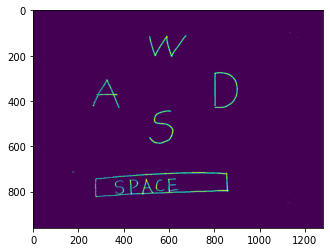

In [130]:
WHITE = np.array([255, 255, 255])
BLACK = np.array([0, 0, 0])
RED = np.array([255, 0, 0])

img = cv2.imread('./images/test_key.jpg')
# img = cv2.imread('www.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

m, n, _ = img.shape
mask = np.zeros((m, n))

print (m, n)

for i in range(m):
    for j in range(n):
        # img[i, j] = WHITE
        if np.absolute(np.sum(img[i, j] - BLACK)) < 150: 
            mask[i, j] = 1

plt.imshow(mask)
# plt.savefig('sao_mask.png')
plt.show()

In [131]:
ma = deepcopy(mask)
ma = mask.astype('uint8')
kernel1 = np.ones((2, 2), np.uint8)
ma = cv2.dilate(ma, kernel1, iterations = 3)

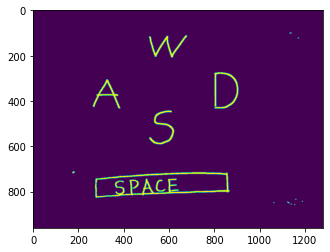

In [132]:
plt.imshow(ma)
plt.show()

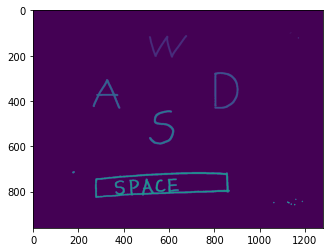

In [133]:
res = label(ma, connectivity = 2)
regions = regionprops(res)
plt.imshow(res)

In [134]:
len(regions)

15

3181


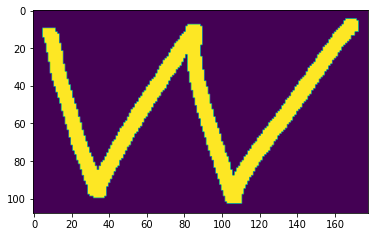

WA
 <class 'str'> 3
3497


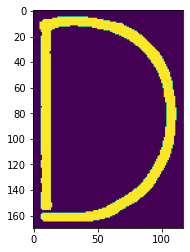

 <class 'str'> 0
2765


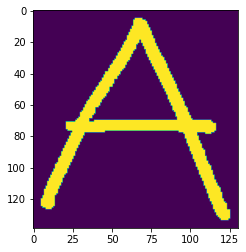

 <class 'str'> 0
2918


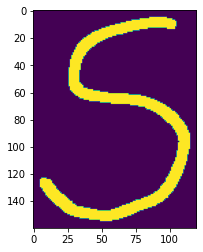

S
 <class 'str'> 2
13348


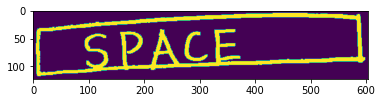

SA
 <class 'str'> 3


In [136]:

for region in regions:
    
    if region.area < 2000: continue
    
    print (region.area)
    minr, minc, maxr, maxc = region.bbox
    
    curr = img[minr - 5 : maxr + 5, minc - 5 : maxc + 5]
#     curr = img[minr : maxr, minc : maxc]
    curr_show = ma[minr - 5 : maxr + 5, minc - 5 : maxc + 5]
    plt.imshow(curr_show)
    plt.show()
    
#     character = pyt.image_to_string(curr, lang='eng',  \
#         config='--psm 10 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

    
#     configuration = ("-l eng --psm 10 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789")
#     configuration = ("-l eng --psm 7")
    configuration = ("-l eng --psm 10 --oem 1 -c tessedit_char_whitelist=AWSD")
    character = pyt.image_to_string(curr, config = configuration)
    
    print (character, type(character), len(character))